# Exercise 2 - Complex Networks
## Author: Aleix Solanes

Apply at least three different algorithms of community detection to the attached networks. It is not necessary to implement them, you may use any free access programs you like. At least one of the algorithms must be based on the optimization of modularity, and you must use at least two different programs (i.e. do not use all algorithms from the same program).

Some of the provided networks come with a reference partition, obtained from real information of the network. In those cases, you must compare your partitions with the reference ones, using at least the following standard measures: Jaccard Index, Normalized Mutual Information and Normalized Variation of Information. Once again, you don't need to implement them, they can be calculated e.g. using Radatools.

In [1]:
import igraph,cairo
import community
import louvain
import networkx as nx

# function to export to .clu by a received list of numbers that refer to a cluster
def export_to_clu(list1,file_name):
    out = '*Vertices ' + str(len(list1)) + '\n'
    for a in list1:
        out += str(a+1)+'\n'
    text_file = open(file_name, "w")
    text_file.write(out)
    text_file.close()

## Algorithms for community detection
### Community structure based on the multilevel algorithm of Blondel et al.
This is a bottom-up algorithm: initially every vertex belongs to a separate community, and vertices are moved between communities iteratively in a way that maximizes the vertices' local contribution to the overall modularity score. When a consensus is reached (i.e. no single move would increase the modularity score), every community in the original graph is shrank to a single vertex (while keeping the total weight of the adjacent edges) and the process continues on the next level. The algorithm stops when it is not possible to increase the modularity any more after shrinking the communities to vertices.

# Model networks

In [2]:
# model
net_model_1 = igraph.read("networks/model/256_4_4_2_15_18_p.net",format="pajek")
net_model_2 = igraph.read("networks/model/256_4_4_4_13_18_p.net",format="pajek")
net_model_3 = igraph.read("networks/model/rb125.net",format="pajek")

clu_model_1 = igraph.read("networks/model/256_4_4_2_15_18_p.clu",format="pajek")
clu_model_2 = igraph.read("networks/model/256_4_4_4_13_18_p.clu",format="pajek")
clu_model_3_1 = igraph.read("networks/model/rb125-1.clu",format="pajek")
clu_model_3_2 = igraph.read("networks/model/rb125-2.clu",format="pajek")
clu_model_3_3 = igraph.read("networks/model/rb125-3.clu",format="pajek")

## 256_4_4_2_15_18

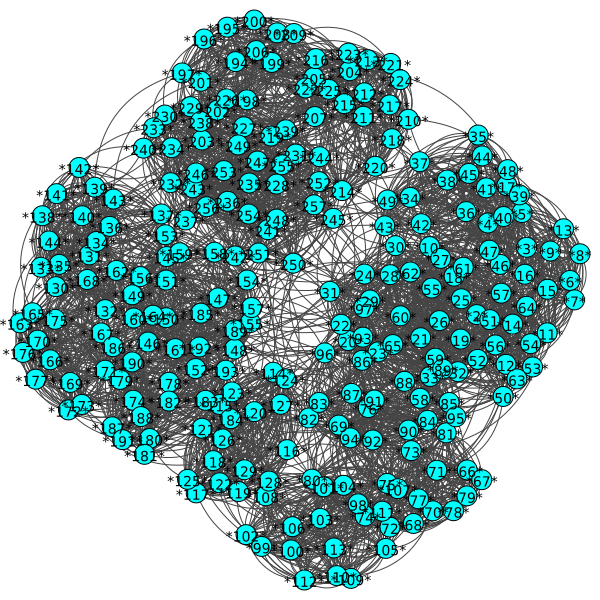

In [3]:
model1_layout = net_model_1.layout("kk")
labels = [vertex['id'] for vertex in net_model_1.vs]
igraph.plot(net_model_1, "net_model_1.png", vertex_color="cyan", vertex_label = labels, layout = model1_layout)

Community:
Clustering with 256 elements and 16 clusters
[ 0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
[ 1] 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31
[ 2] 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47
[ 3] 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63
[ 4] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79
[ 5] 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95
[ 6] 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
     111
[ 7] 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
     126, 127
[ 8] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
     142, 143
[ 9] 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
     158, 159
[10] 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
     174, 175
[11] 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
     190, 191
[12] 192, 193, 1

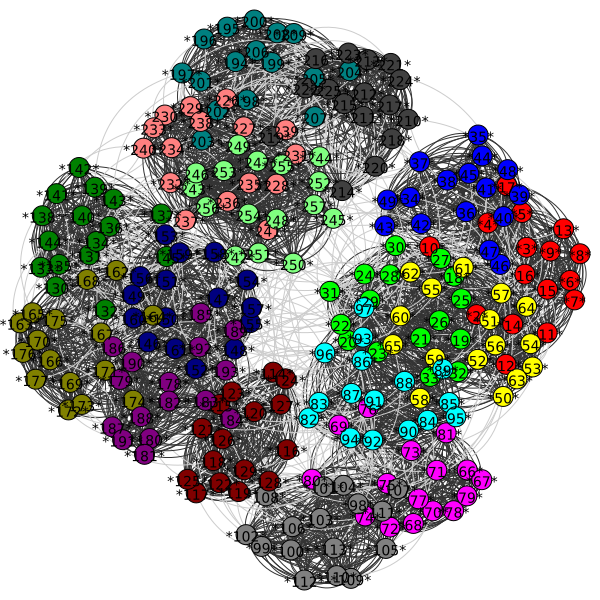

In [4]:
# Community multilevel
com_model1 = net_model_1.community_multilevel()
print "Community:"
print com_model1
print "Membership:"
print com_model1.membership
print "Number of communities:", max(com_model1.membership)+1
mem_model1 = com_model1.membership
print "Modularity:", com_model1.modularity
export_to_clu(com_model1.membership,"clu_multilevel_model1.clu")
igraph.plot(com_model1,"clu_multilevel_model1.png", vertex_label=labels,layout = model1_layout)


Optimal number of clusters: 9
Community:
Clustering with 256 elements and 9 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 48, 49, 50, 51, 52, 53, 54,
    55, 56, 57, 58, 59, 60, 61, 62, 63
[1] 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47
[2] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95
[3] 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
    126, 127
[4] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
    143, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
    174, 175
[5] 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
    159
[6] 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
    191
[7] 192,

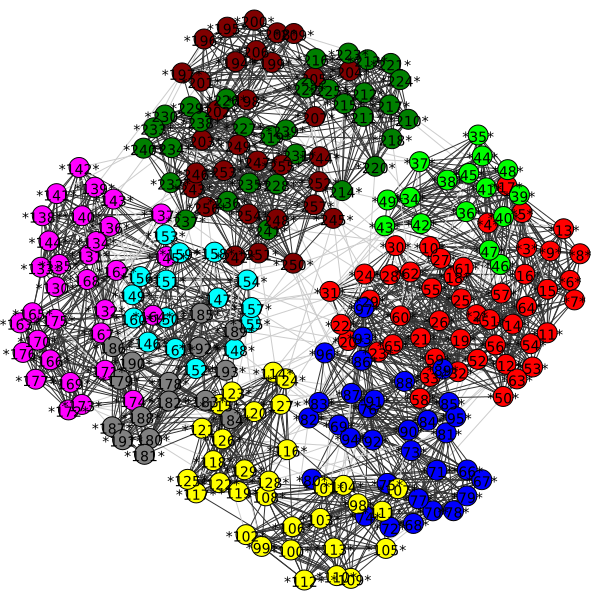

In [5]:
# Community fastgreedy
# simplified to avoid multiple edges in same node pair
com_model1 = net_model_1.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_model_1.community_fastgreedy().optimal_count
print "Community:"
print com_model1
print "Membership:"
print com_model1.membership
print "Number of communities:", max(com_model1.membership)+1
mem_model1 = com_model1.membership
print "Modularity:", com_model1.modularity
export_to_clu(com_model1.membership,"clu_fastgreedy_model1.clu")
igraph.plot(com_model1,"clu_fastgreedy_model1.png", vertex_label=labels,layout = model1_layout)


Community:
Clustering with 256 elements and 16 clusters
[ 0] 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
     254, 255
[ 1] 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
     238, 239
[ 2] 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
     222, 223
[ 3] 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
     206, 207
[ 4] 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
     190, 191
[ 5] 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
     174, 175
[ 6] 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
     158, 159
[ 7] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
     142, 143
[ 8] 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
     126, 127
[ 9] 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
     111
[10] 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 9

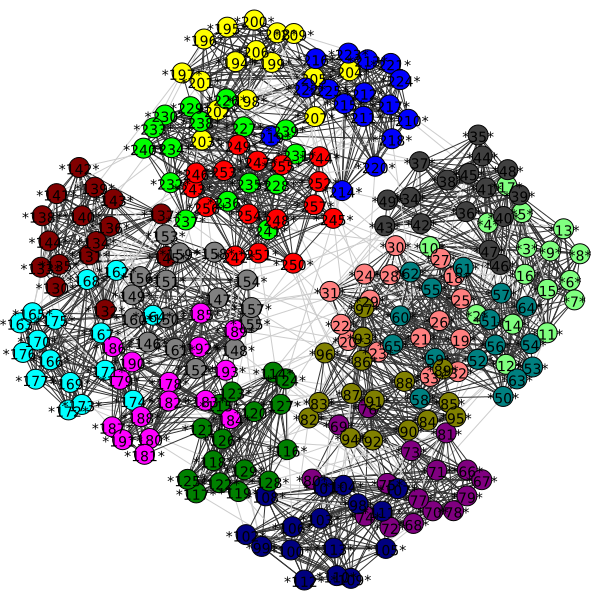

In [6]:
# Louvain
com_model1 = louvain.find_partition(net_model_1, method='Modularity')
print "Community:"
print com_model1
print "Quality:", louvain.quality(net_model_1, com_model1, method='Significance')
print "Modularity:", com_model1.modularity
export_to_clu(com_model1.membership,"clu_louvain_model1.clu")
igraph.plot(com_model1,"clu_louvain_model1.png", vertex_label=labels,layout = model1_layout)

## 256_4_4_4_13_18

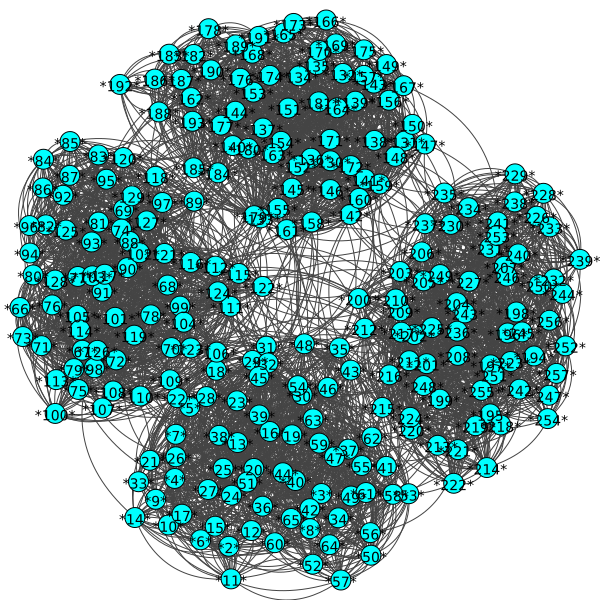

In [7]:
model2_layout = net_model_2.layout("kk")
labels = [vertex['id'] for vertex in net_model_2.vs]
igraph.plot(net_model_2, "net_model_2.png", vertex_color="cyan", vertex_label = labels, layout = model2_layout)

Community:
Clustering with 256 elements and 5 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63
[1] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
    115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127
[2] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
    143
[3] 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
    159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
    174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
    189, 190, 191
[4] 192, 193, 194, 195, 196, 197, 198, 199,

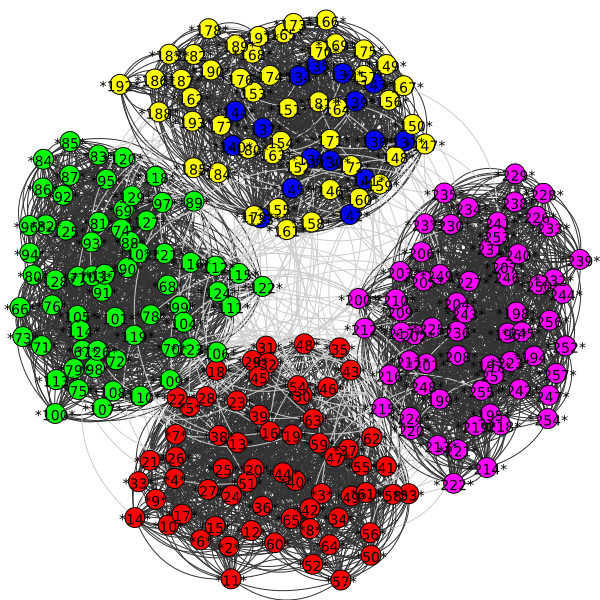

In [8]:
# Community multilevel
com_model2 = net_model_2.community_multilevel()
print "Community:"
print com_model2
print "Membership:"
print com_model2.membership
print "Number of communities:", max(com_model2.membership)+1
mem_model2 = com_model2.membership
print "Modularity:", com_model2.modularity
export_to_clu(com_model2.membership,"clu_multilevel_model2.clu")
igraph.plot(com_model2,"clu_multilevel_model2.png", vertex_label=labels,layout = model2_layout)

Optimal number of clusters: 4
Community:
Clustering with 256 elements and 4 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63
[1] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
    115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127
[2] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
    143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
    158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
    173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
    188, 189, 190, 191
[3] 192, 193, 19

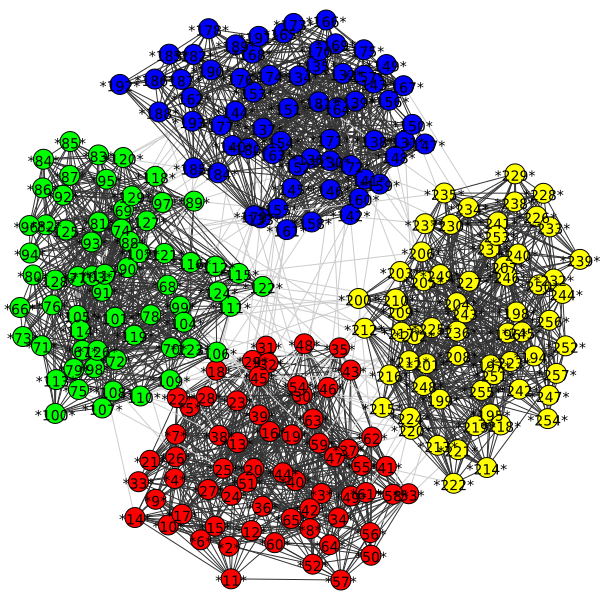

In [9]:
# Community fastgreedy
com_model2 = net_model_2.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_model_2.community_fastgreedy().optimal_count
print "Community:"
print com_model2
print "Membership:"
print com_model2.membership
print "Number of communities:", max(com_model2.membership)+1
mem_model2 = com_model1.membership
print "Modularity:", com_model2.modularity
export_to_clu(com_model2.membership,"clu_fastgreedy_model2.clu")
igraph.plot(com_model2,"clu_fastgreedy_model2.png", vertex_label=labels,layout = model2_layout)

Community:
Clustering with 256 elements and 4 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63
[1] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
    115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127
[2] 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
    143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
    158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
    173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
    188, 189, 190, 191
[3] 192, 193, 194, 195, 196, 197, 198, 199, 20

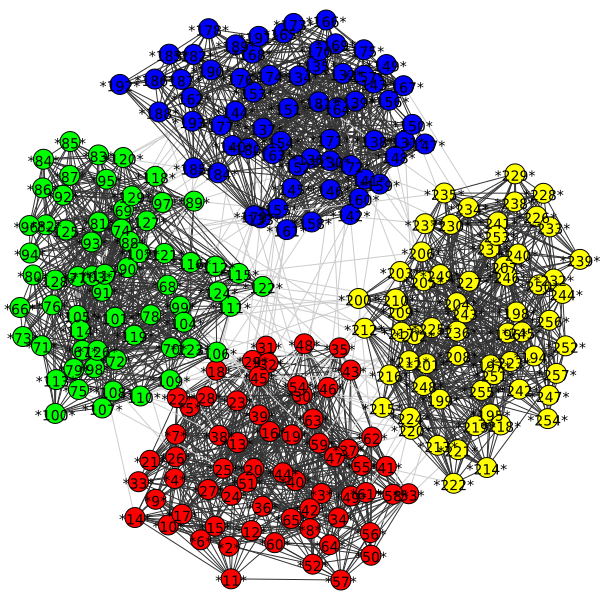

In [10]:
# Louvain
com_model2 = louvain.find_partition(net_model_2, method='Modularity')
print "Community:"
print com_model2
print "Quality:", louvain.quality(net_model_2, com_model2, method='Significance')
print "Modularity:", com_model2.modularity
export_to_clu(com_model2.membership,"clu_louvain_model2.clu")
igraph.plot(com_model2,"clu_louvain_model2.png", vertex_label=labels,layout = model2_layout)

## Rb125

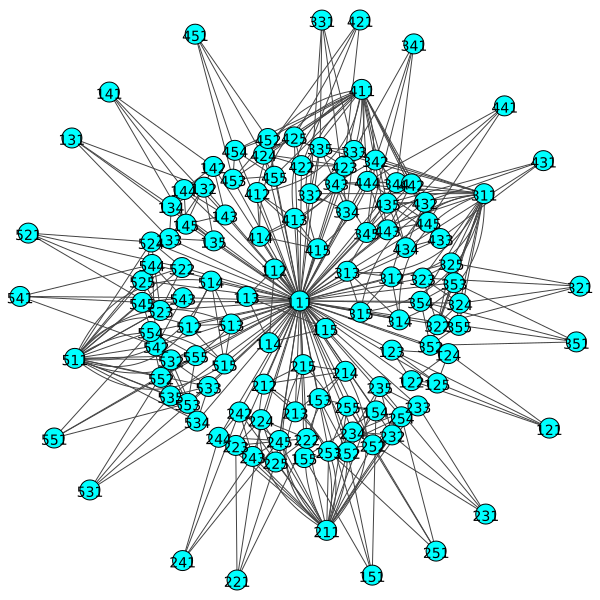

In [11]:
model3_layout = net_model_3.layout("kk")
labels = [vertex['id'] for vertex in net_model_3.vs]
igraph.plot(net_model_3, "net_model_3.png", vertex_color="cyan", vertex_label = labels, layout = model3_layout)

Community:
Clustering with 125 elements and 11 clusters
[ 0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
[ 1] 15, 16, 17, 18, 19
[ 2] 20, 21, 22, 23, 24
[ 3] 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
     43, 44
[ 4] 45, 46, 47, 48, 49
[ 5] 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
     68, 69
[ 6] 70, 71, 72, 73, 74
[ 7] 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
     93, 94
[ 8] 95, 96, 97, 98, 99
[ 9] 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
     114, 115, 116, 117, 118, 119
[10] 120, 121, 122, 123, 124
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9

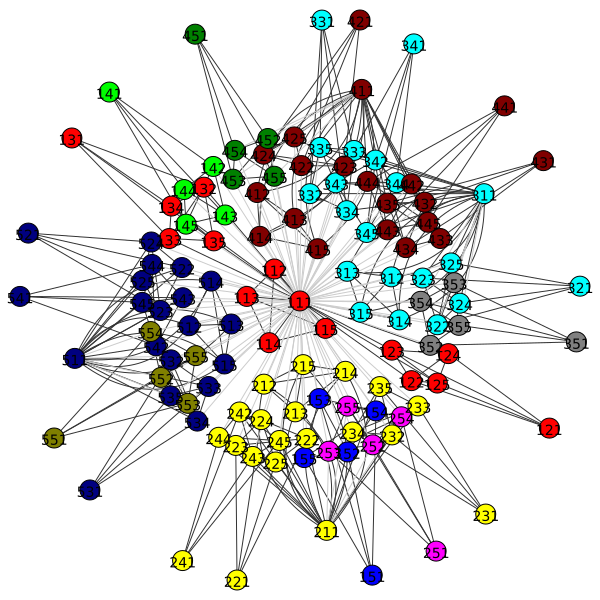

In [12]:
# Community multilevel
com_model3 = net_model_3.community_multilevel()
print "Community:"
print com_model3
print "Membership:"
print com_model3.membership
print "Number of communities:", max(com_model3.membership)+1
mem_model3 = com_model3.membership
print "Modularity:", com_model3.modularity
export_to_clu(com_model3.membership,"clu_multilevel_model3.clu")
igraph.plot(com_model3,"clu_multilevel_model3.png", vertex_label=labels,layout = model3_layout)

Optimal number of clusters: 12
Community:
Clustering with 125 elements and 11 clusters
[ 0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
[ 1] 15, 16, 17, 18, 19
[ 2] 20, 21, 22, 23, 24
[ 3] 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
     43, 44
[ 4] 45, 46, 47, 48, 49
[ 5] 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
     68, 69
[ 6] 70, 71, 72, 73, 74
[ 7] 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
     93, 94
[ 8] 95, 96, 97, 98, 99
[ 9] 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
     114, 115, 116, 117, 118, 119
[10] 120, 121, 122, 123, 124
Membership:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 

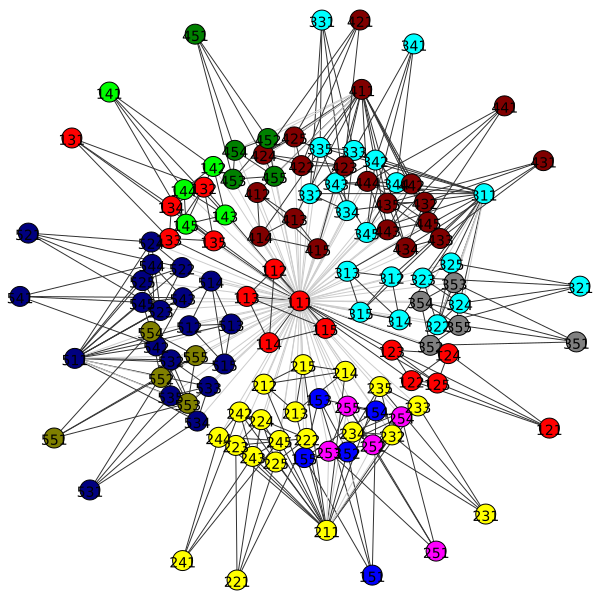

In [13]:
# Community fast-greedy
# simplified to avoid multiple edges in same node pair
com_model1 = net_model_3.simplify().community_fastgreedy().as_clustering()
print "Optimal number of clusters:",net_model_3.community_fastgreedy().optimal_count
print "Community:"
print com_model3
print "Membership:"
print com_model3.membership
print "Number of communities:", max(com_model3.membership)+1
mem_model3 = com_model3.membership
print "Modularity:", com_model3.modularity
export_to_clu(com_model3.membership,"clu_fastgreedy_model3.clu")
igraph.plot(com_model3,"clu_fastgreedy_model3.png", vertex_label=labels,layout = model3_layout)

Community:
Clustering with 125 elements and 12 clusters
[ 0] 25, 26, 27, 28, 29, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
     48, 49
[ 1] 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 70, 71, 72,
     73, 74
[ 2] 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 95, 96, 97,
     98, 99
[ 3] 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
     114, 115, 116, 117, 118, 119
[ 4] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
[ 5] 10, 11, 12, 13, 14
[ 6] 15, 16, 17, 18, 19
[ 7] 20, 21, 22, 23, 24
[ 8] 30, 31, 32, 33, 34
[ 9] 65, 66, 67, 68, 69
[10] 90, 91, 92, 93, 94
[11] 120, 121, 122, 123, 124
Quality: 883.367194108
Modularity: 0.608732897085


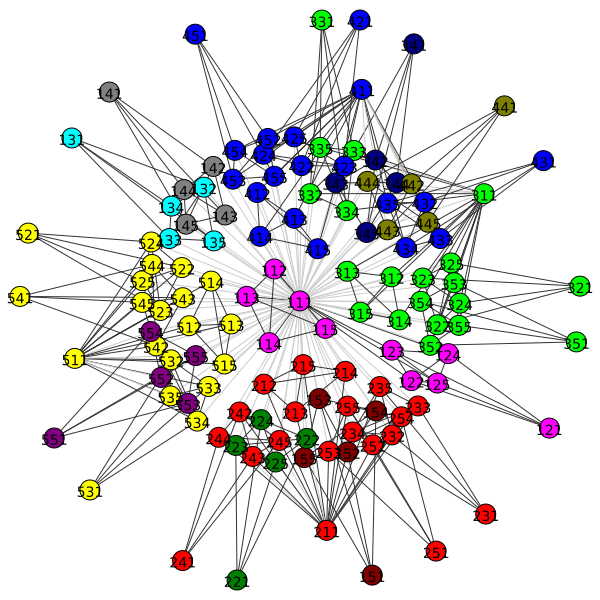

In [14]:
# Louvain
com_model3 = louvain.find_partition(net_model_3, method='Modularity')
print "Community:"
print com_model3
print "Quality:", louvain.quality(net_model_3, com_model3, method='Significance')
print "Modularity:", com_model3.modularity
export_to_clu(com_model3.membership,"clu_louvain_model3.clu")
igraph.plot(com_model3,"clu_louvain_model3.png", vertex_label=labels,layout = model3_layout)